In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Forced Linear Oscillator

We consider the generic linear oscillator with sinusoidal forcing:

$$
my''+cy'+ky=F\cos(\alpha t)
$$

We assume that $m$ and $k$ are positive, and $c\ge 0$.

We can compute closed-form solutions for all cases, so it becomes relatively easy to draw graphs of the solution curves.

## Undamped Forced Oscillator

This is the case $c=0$, so that the equation becomes:

$$
my''+ky=F\cos(\alpha t)
$$

### Complementary Solution
The associated homogeneous equation is $my''+ky=0$, which gives the complementary solution:

$$
y_c=c_1\cos(\omega x)+c_2\sin(\omega x),\quad\text{where}\quad\omega=\sqrt{k/m}
$$

### Particular Solution

It remains to find a particular solution. Our strategy is to solve the complex equation below and take the real part:

$$
my''+ky=Fe^{i\alpha t}
$$

The form of the particular solution depends on whether $\alpha\ne\omega$ or $\alpha=\omega$, so we consider two subcases.

#### Subcase 1: $\alpha\ne\omega$

In this case we try the solution:

$$
y_{\text{Complex}}(t)=Ae^{i\alpha t}
$$

$A$ is a constant to be determined. Compute the first two derivatives:

$$
y_{\text{Complex}}'(t)=i\alpha Ae^{i\alpha t},\quad y_{\text{Complex}}''(t)=-\alpha^2 Ae^{i\alpha t}
$$

Plugging into the equation we get:

$$
my_{\text{Complex}}''(t)+ky_{\text{Complex}}(t)=m(-\alpha^2 Ae^{i\alpha t}) + k(Ae^{i\alpha t})=A(k-m\alpha^2)e^{i\alpha t}=Fe^{i\alpha t}
$$

From this we get $A=F/(k-m\alpha^2)$, so that we get:

$$
y_{\text{Complex}}(t)=\frac{F}{k-m\alpha^2}e^{i\alpha t}=\frac{F}{k-m\alpha^2}(\cos(\alpha t)+i\sin(\alpha t))
$$

Taking the real part, we get the particular solution:

$$
y_p=\frac{F}{k-m\alpha^2}\cos(\alpha t)
$$

The general solution of the forced equation is $y(t)=y_c(t)+y_p(t)$:

$$
y(t)=c_1\cos(\omega t)+c_2\sin(\omega t)+\frac{F}{k-m\alpha^2}\cos(\alpha t)
$$

The constants $c_1$ and $c_2$ are computed from the initial conditions.

#### Subcase 2: $\alpha=\omega$.

In this case, we try the solution:

$$
y_{\text{Complex}}(t)=Ate^{i\omega t}
$$

$A$ is a constant to be determined. Compute the first two derivatives:

$$
y_{\text{Complex}}'(t)=A(1+i\omega t)e^{i\omega t},\quad y_{\text{Complex}}''(t)=A(2i\omega-\omega^2t)e^{i\omega t}
$$

Plugging into the equation:
$$
my_{\text{Complex}}''(t)+ky_{\text{Complex}}(t)=mA(2i\omega-\omega^2t)e^{i\omega t}+kAte^{i\omega t}=A(2i\omega )e^{i\omega t}
$$

In simplifying the equation above, we used the fact that $k-m\omega^2=0$. We thus get:

$$
A(2i\omega)e^{i\omega t}=Fe^{i\omega t}
$$

So that $A = F/(2i\omega)=-iF/(2\omega)$. It follows that:

$$
y_{\text{Complex}}(t)=-\frac{iF}{2\omega}te^{i\omega t}=-\frac{iF}{2\omega}(t\cos(\omega t)+it\sin(\omega t))=
\frac{F}{2\omega}(-it\cos(\omega t)+t\sin(\omega t))
$$

Taking the real part we get:

$$
y_p(t)=\frac{F}{2\omega}t\sin(\omega t)
$$

The general solution will then be:

$$
y(t)=c_1\cos(\omega t)+c_2\sin(\omega t)++\frac{F}{2\omega}t\sin(\omega t)
$$

We now define a function factory that return the solutions:

In [2]:
def make_undamped_forced_oscillator(m, k, F, alpha, c1, c2):
    omega = np.sqrt(k/m)
    delta = k-m*alpha**2
    if delta == 0:
        return lambda t: (c1*np.cos(omega*t) + c2*np.sin(omega*t) + 
                          F/(2*omega)*t*np.sin(omega*t))
    else:
        return lambda t: (c1*np.cos(omega*t) + c2*np.sin(omega*t) + 
                          F/delta*np.cos(alpha*t))

Let's first make some graphics for the case where $\omega\ne\alpha$:

##### Example 1: $m=1, k=1, F=1, \alpha=3, c_1=1, c_2=0$

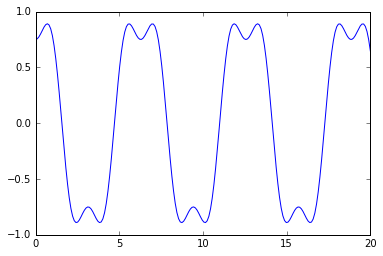

In [3]:
m, k, F, alpha, c1, c2 = 1, 1, 2, 3, 1, 0
tmax, npoints = 20, 200
y = make_undamped_forced_oscillator(m, k, F, alpha, c1, c2)
tvalues = np.linspace(0, tmax, npoints)
yvalues = y(tvalues)
plt.plot(tvalues, yvalues)
None

The oscillation in this case is periodic, but clearly are not a trigonometric function.

##### Example 2: $m=1, k=1, F=1, \alpha=\pi, c_1=1, c_2=0$

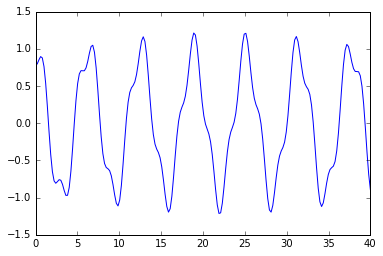

In [4]:
m, k, F, alpha, c1, c2 = 1, 1, 2, np.pi, 1, 0
tmax, npoints = 40, 200
y = make_undamped_forced_oscillator(m, k, F, alpha, c1, c2)
tvalues = np.linspace(0, tmax, npoints)
yvalues = y(tvalues)
plt.plot(tvalues, yvalues)
None

In this case, the oscillation is _not_ periodic. It can be shown that $y(t)$ is a periodic function if and only if the ratio $\alpha/\omega$ is a rational number.

An interesting phenomenon happens when the forcing frequency is close to the natural frequency of the oscillator, that is, $\alpha\approx\omega$. This is illustrated in the following plot.

##### Example 3: $m=1, k=1, F=1, \alpha=1.001, c_1=1, c_2=0$

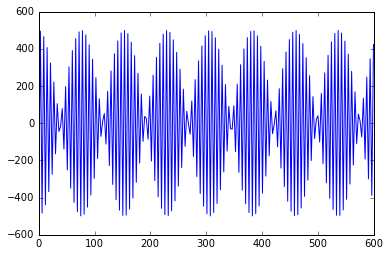

In [5]:
m, k, F, alpha, c1, c2 = 1, 1, 1, 1.001, 1, 0
tmax, npoints = 600, 200
y = make_undamped_forced_oscillator(m, k, F, alpha, c1, c2)
tvalues = np.linspace(0, tmax, npoints)
yvalues = y(tvalues)
plt.plot(tvalues, yvalues)
None

This wave form illustrates the "beats" phenomenon. The solution has two components. The components $R\cos(\omega t-\phi)$ represents the natural oscillation of the unforced system, and $\frac{F}{k-m\alpha^2}\cos(\alpha t)$. When the frequencies of the two components are near each other, they will go in and out of phase as time passes. When the oscillations are in phase, there is constructive interference, and the size of the oscillations grows. When they are out of phase, there is destructive interference, and the oscillations cancel each other. This phenomenon can be clearly heard in interference of sound waves.

A demonstration of this phenonmenon can be found at http://birdglue.com/music-class/beats/index.html

In the next example, the natural and forcing frequencies are the same, and we get oscillations that grow in amplitude as time passes. This phenomenon is called _ressonance_.

##### Example 4: $m=1, k=1, F=1, \alpha=1, c_1=1, c_2=0$

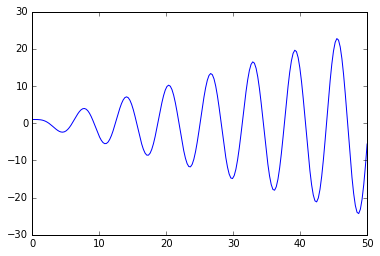

In [6]:
m, k, F, alpha, c1, c2 = 1, 1, 1, 1, 1, 0
tmax, npoints = 50, 200
y = make_undamped_forced_oscillator(m, k, F, alpha, c1, c2)
tvalues = np.linspace(0, tmax, npoints)
yvalues = y(tvalues)
plt.plot(tvalues, yvalues)
None

Ressonance is an important phenomenon, that has important applications in different areas.

In engineering buildings and bridges, it is important to design the structures in a way that their natural vibrating frequencies are far away from the frequency of external forces, such as wind. Otherwise, the structure may start oscillating with large amplitudes, and eventually fail. This is illustrated in the video on the link https://www.youtube.com/watch?v=gQK21572oSU

## Damped Forced Oscillator

Now the equation is:

$$
my''+cy'+ky=F\cos(\alpha t)
$$

The parameters $m$, $c$ and $k$ are all assumed to be positive. 

### Complementary Solution

We first find the complementary solution $y_c(t)$, which is the general solution of the homogeneous equation:

$$
my''+cy'+ky=0
$$

The characteristic equation is:

$$
m\lambda^2+c\lambda+k=0
$$

The solution of this quadratic is:

$$
\lambda=\frac{-c\pm\sqrt{c^2-4mk}}{2m}
$$

The form of the solutions will depend on the relative sizes of the parameters $m$, $c$ and $k$. There are three cases are:

#### Underdamped oscillator: $c<\sqrt{4mk}$

In this case the solutions of the characteristic equation are imaginary:

$$
\lambda=-\frac{c}{2m}\pm i\omega,\quad
\text{where}\quad\omega=\frac{\sqrt{4mk-c^2}}{2m}
$$

We thus get the solution:

$$
y_c(t)=e^{-ct/2m}(c_1\cos(\omega t)+c_2\sin(\omega t))
$$

The solution in this case is an exponentially decaying oscillation.

#### Overdamped oscillator: $c>\sqrt{4mk}$

In this case the solutions of the characteristic equation are real and distinct. We let:

$$
\lambda_1=\frac{-c-\sqrt{c^2-4mk}}{2m}\quad\text{and}\quad
\lambda_2=\frac{-c+\sqrt{c^2-4mk}}{2m}
$$

Then, the solution complementary solution is:

$$
y_c(t)=c_1e^{\lambda_1t}+c_2e^{\lambda_2t}
$$

Notice that $\lambda_1<\lambda_2<0$, so $y_c(t)\to0$ as $t\to\infty$.

#### Critically damped oscillator: $c=\sqrt{4mk}$

In this case the characteristic equation has a single real solution:

$$
\lambda_1=\lambda_2=-\frac{c}{2m}
$$

The complementary solution is:

$$
y_c(t)=(c_1+c_2t)e^{-ct/2m}
$$

We notice that, in this case too, $y_c(t)\to0$ as $t\to\infty$.

### Particular Solution

We now turn to the problem of finding the particular solution of:

$$
my''+cy'+ky=F\cos(\alpha t)
$$

The solution is obtained by finding taking the real part of the solution of the differential equation

$$
my''+cy'+ky=Fe^{i\alpha t}
$$

We now make an important observation: _the coefficient of the exponent in the forcing term, $i\alpha$, cannot be a solution of the characteristic equation_. To see why, notice that, in all cases discussed above, the solutions of the characteristic equation have negative real part, while $i\alpha$ has zero real part.

It follows that the form of the complex solution is:

$$
y_{\text{Complex}}(t)=Ae^{i\alpha t}
$$

The first two derivatives of $y_{\text{Complex}}(t)$ are:

$$
y_{\text{Complex}}'(t)=i\alpha Ae^{i\alpha t}\quad\text{and}\quad
y_{\text{Complex}}''(t)=-\alpha^2Ae^{i\alpha t}
$$

Plugging into the equation we have:

\begin{multline*}
my_{\text{Complex}}'+cy_{\text{Complex}}'+ky_{\text{Complex}}=\\
m(-\alpha^2Ae^{i\alpha t})+c(i\alpha Ae^{i\alpha t})+k(Ae^{i\alpha t})=
A(k-\alpha^2m+i\alpha c)e^{i\alpha t}
\end{multline*}

This will be a solution if:

$$
A=\frac{F}{k-\alpha^2m+i\alpha c}=
\frac{F}{(k-\alpha^2m)^2+\alpha^2c^2}(k-\alpha^2m+i\alpha c)
$$

We conclude that:

\begin{multline*}
y_{\text{Complex}}(t)=
\frac{F}{(k-\alpha^2m)^2+\alpha^2c^2}(k-\alpha^2m+i\alpha c)e^{i\alpha t}=\\
\frac{F}{(k-\alpha^2m)^2+\alpha^2c^2}(k-\alpha^2m+i\alpha c)(\cos(\alpha t)+i\sin(\alpha t))
\end{multline*}

The particular solution is the real part of this expression:

$$
y_p(t)=\frac{F}{(k-\alpha^2m)^2+\alpha^2c^2}((k-\alpha^2m)\cos(\alpha t)-\alpha c\sin(\alpha t))
$$

The general solution of the forced equation is, as always, $y(t)=y_c(t)+y_p(t)$.

$$
y_p(t)=\frac{F}{(k-\alpha^2m)^2+\alpha^2c^2}((k-\alpha^2m)\cos(\alpha t)-\alpha c\sin(\alpha t))
$$

We now use the formulas developed above to define a function factory for solutions.

In [7]:
def make_damped_forced_oscillator(m, c, k, F, alpha, c1, c2):
    discr = c**2 - 4*m*k
    k1 = k - alpha**2 * m
    k2 = alpha * c
    if discr < 0:
        omega = np.sqrt(-discr) / (2*m)
        r = -c/(2*m)
        return lambda t: (np.exp(r*t) * (c1*np.cos(omega*t) + c2*np.sin(omega*t)) +
                          F/((k1**2+k2**2)) * (k1*np.cos(alpha*t) + k2*np.sin(alpha*t)))
    elif discr > 0:
        delta = np.sqrt(discr)
        r1, r2 = (-c - delta) / (2*m), (-c + delta) / (2*m)
        return lambda t: (c1*np.exp(r1*t) + c2*np.exp(r2*t) + 
                          F/((k1**2+k2**2)) * (k1*np.cos(alpha*t) + k2*np.sin(alpha*t)))
    else:
        r = -c / (2*m)
        return lambda t: ((c1 + c2*t) * np.exp(r*t) +
                          F/((k1**2+k2**2)) * (k1*np.cos(alpha*t) + k2*np.sin(alpha*t)))

Let's now plot some solutions. Let's first plot solutions corresponding to the underdamped, overdamped and critically damped oscillators

##### Example 5: $m=1, c=1, k=1, F=2, \alpha=1, c_1=20, c_2=0$ (Underdamped)

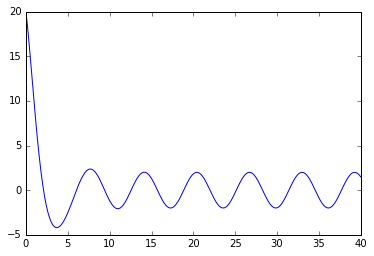

In [8]:
m, c, k, F, alpha, c1, c2 = 1, 1, 1, 2, 1, 20, 0
tmax, npoints = 40, 200
y = make_damped_forced_oscillator(m, c, k, F, alpha, c1, c2)
tvalues = np.linspace(0, tmax, npoints)
yvalues = y(tvalues)
plt.plot(tvalues, yvalues)
None

##### Example 6: $m=1, c=2.5, k=1, F=2, \alpha=1, c_1=20, c_2=0$ (Overdamped)

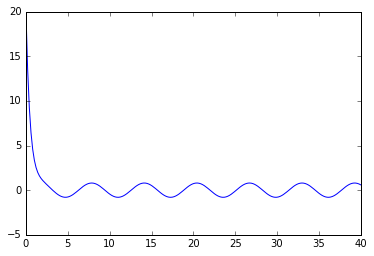

In [9]:
m, c, k, F, alpha, c1, c2 = 1, 2.5, 1, 2, 1, 20, 0
tmax, npoints = 40, 200
y = make_damped_forced_oscillator(m, c, k, F, alpha, c1, c2)
tvalues = np.linspace(0, tmax, npoints)
yvalues = y(tvalues)
plt.plot(tvalues, yvalues)
None

##### Example 7: $m=1, c=2, k=1, F=2, \alpha=1, c_1=20, c_2=0$ (Critically damped)

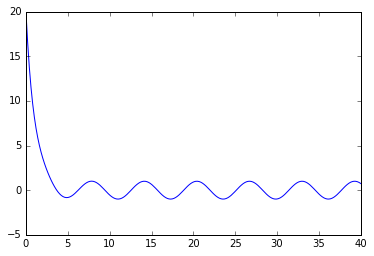

In [10]:
m, c, k, F, alpha, c1, c2 = 1, 2, 1, 2, 1, 20, 0
tmax, npoints = 40, 200
y = make_damped_forced_oscillator(m, c, k, F, alpha, c1, c2)
tvalues = np.linspace(0, tmax, npoints)
yvalues = y(tvalues)
plt.plot(tvalues, yvalues)
None

The solutions in all cases have similar behavior. There initially is a _transient component_ that goes to zero exponentially. The system then settles in the _persistent component_ that is periodic and has the same frequency as the _forcing_ term. Notice that the solutions are _always bounded_.

The amplitude of the persistent component is:

$$
\frac{F}{(k-\alpha^2m)^2+\alpha^2c^2}\sqrt{(k-\alpha^2m)^2+\alpha^2 c^2}=\frac{F}{\sqrt{(k-\alpha^2m)^2+\alpha^2 c^2}}
$$

The amplitude of the oscillator depends on $F$ $m$, $c$, $k$ and $\alpha$. The formula above can be summarized saying the the oscillator multiplies the amplitude of the forcing term by:

$$
\frac{1}{\sqrt{(k-\alpha^2m)^2+\alpha^2 c^2}}
$$

For a fixed oscillator, the amplitude multiplier depends on the frequency of the forcing term, $\alpha$. We call this the _amplitude frequency response_ of the oscillator. Let's plot this quantity for the particular case $m=k=1$ and $c=0.5$: 

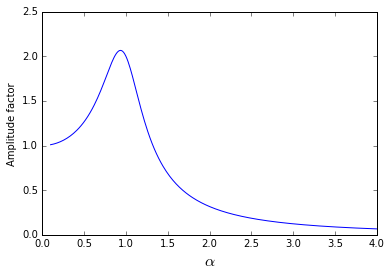

In [11]:
m, c, k = 1, 0.5, 1
alpha_values=np.linspace(0.1, 4, 300)
gain_values=1/np.sqrt((k-alpha_values**2*m)**2+alpha_values**2*c**2)
plt.plot(alpha_values, gain_values)
plt.xlabel('$\\alpha$', fontsize=16)
plt.ylabel('Amplitude factor')
None

Notice that the amplitude peaks at a value of approximately $2$ around $\alpha=1$. This means that the amplitude of the oscillations will be _twice_ the size of the amplitude of the forcing term. 

It is relatively easy to find the frequency that maximizes the amplitude factor. We must minimize the denominator or the amplitude magnification factor:

$$
(k-\alpha^2m)^2+\alpha^2 c^2=k^2-2\alpha^2m+\alpha^4m^2+\alpha^2c^2=k^2+(c^2-2m)\alpha^2+m^2\alpha^4
$$

The derivative of this expression with respect to $\alpha$ is:

$$
(c^2-2m)(2\alpha)+4m^2\alpha^3=2\alpha((c^2-2m)+2m^2\alpha^2)
$$

One of the zeros of the derivative is $\alpha=0$, which is of no interest for us. If $2m>c^2$, there is another zero at:

$$
\alpha=\sqrt{\frac{2m-c^2}{2m^2}}
$$

This is the frequency that corresponds to the sharp peak in the picture above. The exact value is:

In [12]:
alpha_max = np.sqrt((2*m-c**2) / (2*m**2))
alpha_max

0.93541434669348533

The maximum amplitude magnification is:

In [13]:
max_factor = 1/np.sqrt((k-alpha_max**2*m)**2+alpha_max**2*c**2)
max_factor

2.0655911179772888